In [1]:
# 범주형 - 수치형 구조에 대한 데이터 분석

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder


print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('seaborn version:', sns.__version__)
print(f"matplotlib: mpl {plt.matplotlib.__version__}")
print('sklearn version:', sklearn.__version__)
#
font_path = "c:/Windows/Fonts/malgun.ttf"
font_prop = mpl.font_manager.FontProperties(fname=font_path)
mpl.rcParams['font.family'] = font_prop.get_name()
mpl.rcParams['axes.unicode_minus'] = False

numpy version: 2.1.0
pandas version: 2.2.2
seaborn version: 0.13.2
matplotlib: mpl 3.9.2
sklearn version: 1.5.1


In [14]:
accident = pd.read_csv('accident.csv')

In [7]:
accident.head()

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2014010100100005,2014년 1월 1일 00시,수요일,서울특별시 구로구 오류동,부상신고사고,0,0,0,2,차대차 - 기타,...,맑음,단일로 - 기타,승용,남,31세,상해없음,승용,남,65세,부상신고
1,2014010100100029,2014년 1월 1일 01시,수요일,서울특별시 성동구 마장동,중상사고,0,1,3,0,차대차 - 기타,...,맑음,단일로 - 기타,승용,남,32세,상해없음,승용,남,54세,중상
2,2014010100100050,2014년 1월 1일 02시,수요일,서울특별시 광진구 광장동,중상사고,0,1,0,4,차대차 - 추돌 - 진행중,...,맑음,단일로 - 기타,승용,남,26세,상해없음,승용,여,26세,부상신고
3,2014010100100053,2014년 1월 1일 02시,수요일,서울특별시 구로구 개봉동,경상사고,0,0,2,0,차대차 - 기타,...,맑음,단일로 - 기타,승용,남,29세,상해없음,승용,남,25세,경상
4,2014010100100054,2014년 1월 1일 02시,수요일,서울특별시 양천구 목동,경상사고,0,0,2,0,차대차 - 측면직각충돌,...,맑음,교차로 - 교차로안,승용,여,42세,상해없음,승용,남,37세,경상


In [8]:
accident.columns

Index(['사고번호', '사고일시', '요일', '시군구', '사고내용', '사망자수', '중상자수', '경상자수', '부상신고자수',
       '사고유형', '법규위반', '노면상태', '기상상태', '도로형태', '가해운전자 차종', '가해운전자 성별',
       '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별', '피해운전자 연령',
       '피해운전자 상해정도'],
      dtype='object')

In [15]:
df = accident[['사망자수', '중상자수', '경상자수', '부상신고자수', '사고유형']]


In [16]:
# MANOVA를 활용한 분석 실시.(다수의 수치형과 범주형을 비교 할 때 용이)
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.multivariate.manova import MANOVA
# OLS 모델 생성
manova = MANOVA.from_formula('사망자수 + 중상자수 + 경상자수 + 부상신고자수 ~ 사고유형', data=df)
manova_results = manova.mv_test()

# 결과 출력
print(manova_results)

                    Multivariate linear model
                                                                  
------------------------------------------------------------------
         Intercept        Value  Num DF   Den DF   F Value  Pr > F
------------------------------------------------------------------
            Wilks' lambda 0.9494 4.0000 26245.0000 349.7561 0.0000
           Pillai's trace 0.0506 4.0000 26245.0000 349.7561 0.0000
   Hotelling-Lawley trace 0.0533 4.0000 26245.0000 349.7561 0.0000
      Roy's greatest root 0.0533 4.0000 26245.0000 349.7561 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
          사고유형          Value   Num DF    Den DF   F Value  Pr > F
------------------------------------------------------------------
          Wilks' lambda 0.8778 84.0000 103667.7735  41.3948 0.0000
         Pillai'

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

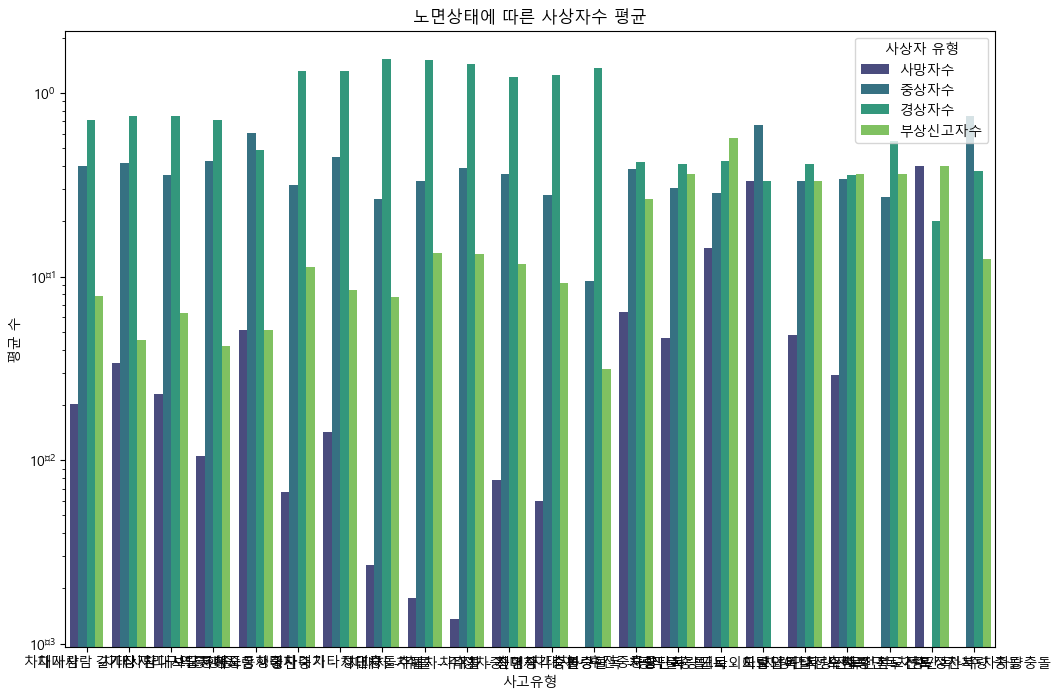

In [12]:
# 시각화 자료 비교, 일부 수치의 규모가 차이나서 로그스케일 적용
mean_scores = df.groupby('사고유형').mean().reset_index()

# 데이터프레임을 길게 변환
mean_scores_melted = mean_scores.melt(id_vars='사고유형', var_name='사상자 유형', value_name='평균 수')

# 막대 그래프 그리기
plt.figure(figsize=(12, 8))
sns.barplot(x='사고유형', y='평균 수', hue='사상자 유형', data=mean_scores_melted, palette='viridis')
plt.yscale('log')
plt.title('노면상태에 따른 사상자수 평균')
plt.xlabel('사고유형')
plt.ylabel('평균 수')
plt.legend(title='사상자 유형')
plt.show()

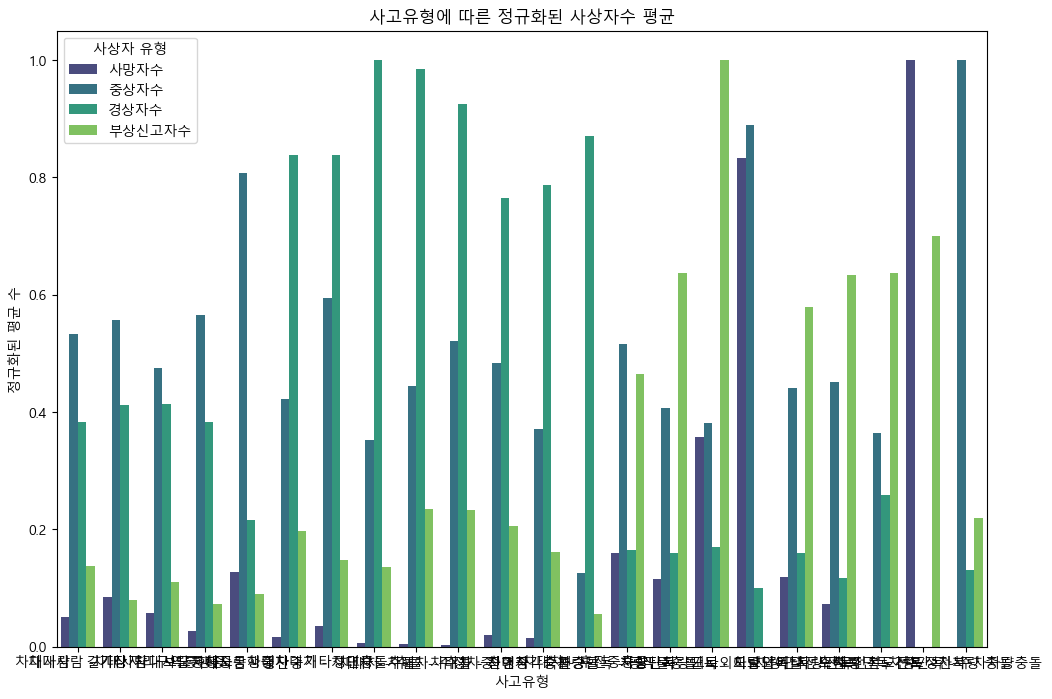

In [17]:
# 시각화 자료 비교, 일부 수치의 규모가 차이나서 정규화 실시 [0~1]로 수정하는 것.
from sklearn.preprocessing import MinMaxScaler

# 데이터 정규화
scaler = MinMaxScaler()
mean_scores_scaled = mean_scores.copy()
mean_scores_scaled[['사망자수', '중상자수', '경상자수', '부상신고자수']] = scaler.fit_transform(mean_scores[['사망자수', '중상자수', '경상자수', '부상신고자수']])

# 데이터프레임을 길게 변환
mean_scores_scaled_melted = mean_scores_scaled.melt(id_vars='사고유형', var_name='사상자 유형', value_name='정규화된 평균 수')

# 막대 그래프 그리기
plt.figure(figsize=(12, 8))
sns.barplot(x='사고유형', y='정규화된 평균 수', hue='사상자 유형', data=mean_scores_scaled_melted, palette='viridis')
plt.title('사고유형에 따른 정규화된 사상자수 평균')
plt.xlabel('사고유형')
plt.ylabel('정규화된 평균 수')
plt.legend(title='사상자 유형')
plt.show()

C:\Users\medici\AppData\Local\Temp\ipykernel_38032\4277319579.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='사고유형', y=var, data=mean_scores, ax=axes[row, col], palette='viridis')
C:\Users\medici\AppData\Local\Temp\ipykernel_38032\4277319579.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='사고유형', y=var, data=mean_scores, ax=axes[row, col], palette='viridis')
C:\Users\medici\AppData\Local\Temp\ipykernel_38032\4277319579.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='사고유형', y=var, data=mean_scores, ax=axes[row, col], palet

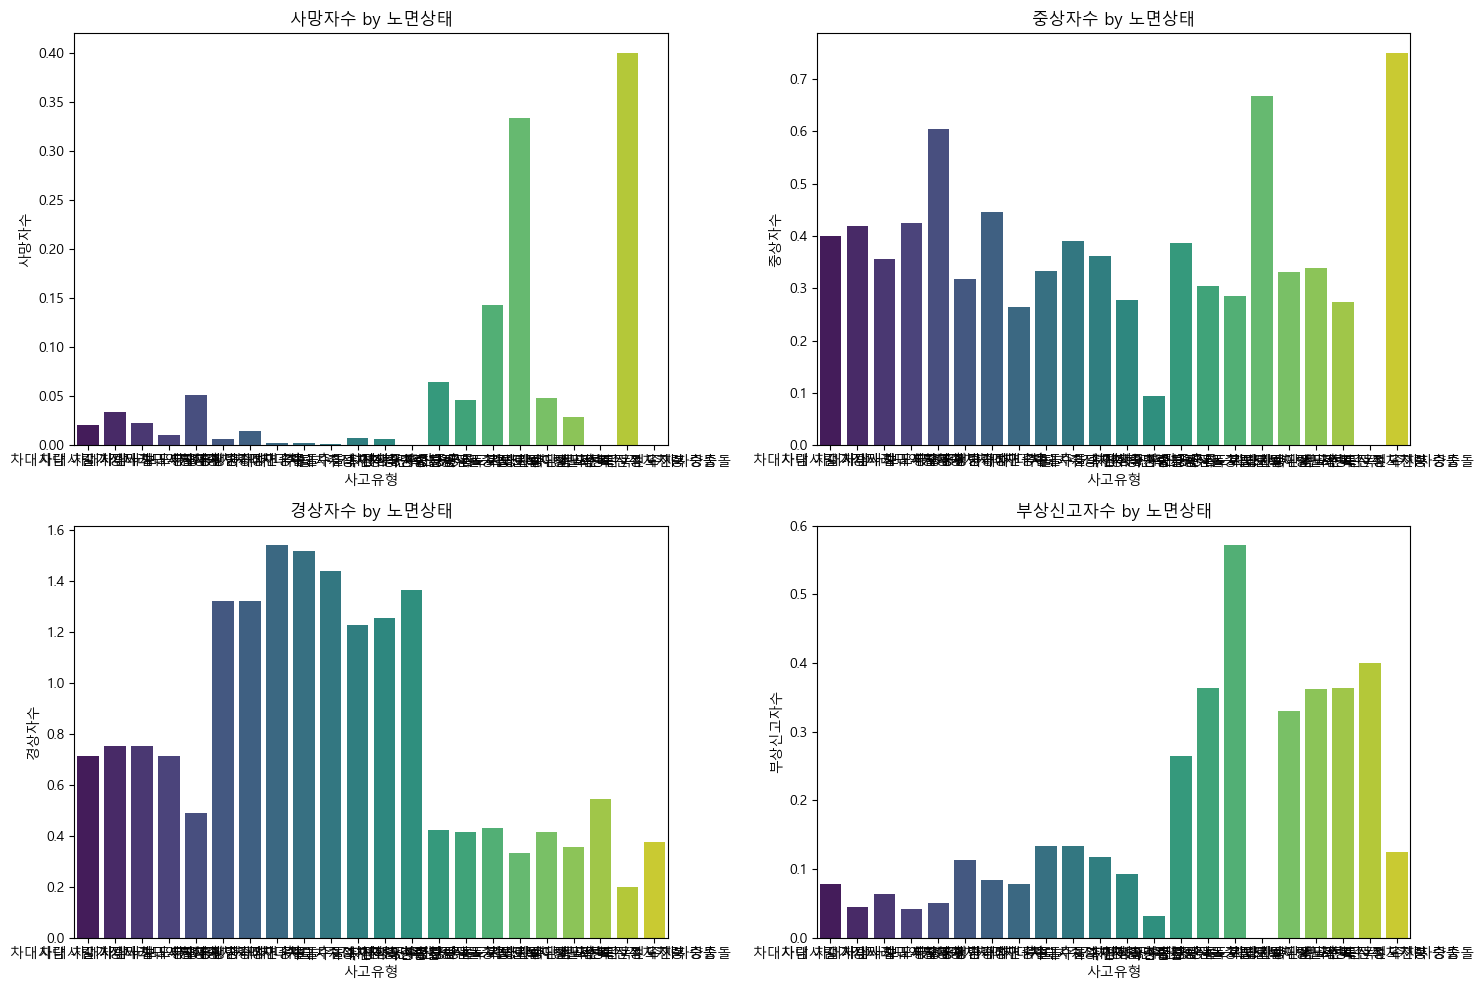

In [19]:
# 서브플롯 생성
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# 각 변수에 대해 막대 그래프 그리기
variables = ['사망자수', '중상자수', '경상자수', '부상신고자수']
for i, var in enumerate(variables):
    row, col = divmod(i, 2)
    sns.barplot(x='사고유형', y=var, data=mean_scores, ax=axes[row, col], palette='viridis')
    axes[row, col].set_title(f'{var} by 노면상태')
    axes[row, col].set_xlabel('사고유형')
    axes[row, col].set_ylabel(var)

plt.tight_layout()
plt.show()
